<a href="https://colab.research.google.com/github/kelvin-kiplagat/neural-imaging-analysis/blob/main/neural_images_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [ ]:
path = './drive/MyDrive/Colab Notebooks/images'

image_fnames_labels = {
    'swi': 'sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_acq-mag_veno.nii.gz',
    'tof': 'sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_angio.nii.gz',
    't1': 'sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_T1w.nii.gz',
    't2': 'sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_T2w.nii.gz',
    'dwi': 'sub-01_ses-forrestgump_dwi_sub-01_ses-forrestgump_dwi.nii.gz',
    'bold':'sub-01_ses-forrestgump_func_sub-01_ses-forrestgump_task-forrestgump_acq-dico_run-01_bold.nii.gz'
}

In [ ]:
nib.load(path+'/'+'sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_acq-mag_veno.nii.gz').shape

(512, 512, 500)

In [ ]:
# -*- coding: utf-8 -*-
#%%
image_info = {k:nib.load(f'{path}/{v}').get_fdata() for k,v in image_fnames_labels.items()}
# labels = ['swi','tof','t1','t2','dwi','bold']

#%% Part 1(a)
z_img_slice = {}
for lab,niimage in image_info.items():
    zs = niimage.shape[2]
    mid_zs = zs // 2
    if len(niimage.shape) <= 3:
        z_slice = np.rot90(niimage[:, :, mid_zs], k=1) # Transpose
    else:
        z_slice = np.rot90(niimage[:, :, mid_zs, 0], k=1)
    print(z_slice.shape)
    z_img_slice[lab] = z_slice
    del(z_slice) # delete variable to keep memory efficiency

(512, 512)
(640, 480)
(384, 274)
(384, 274)
(144, 144)
(160, 160)


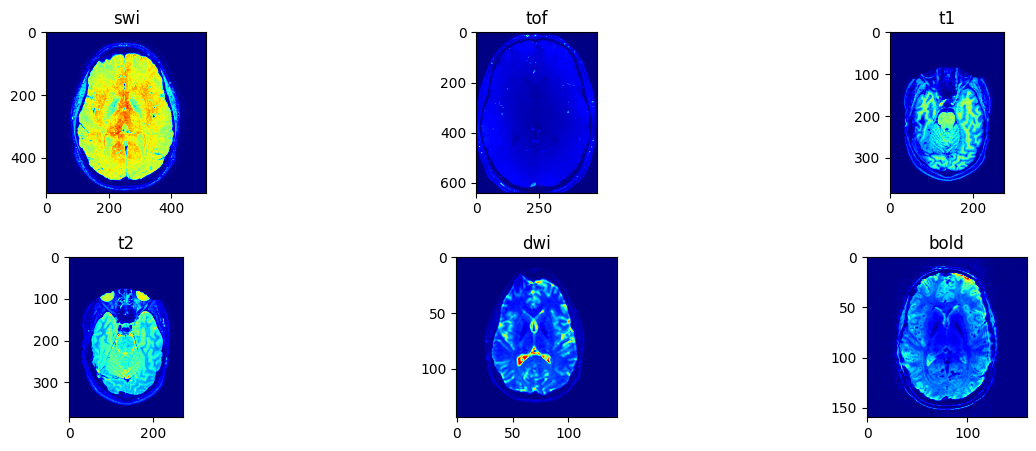

In [ ]:

# Plot all the images in a single figure
fig, ax = plt.subplots(nrows= 2, ncols = 3, figsize = (15, 5), gridspec_kw={'hspace': 0.4})
for i, k in enumerate(z_img_slice):
    if i < 3:
        ax[0, i].imshow(z_img_slice[k], cmap = 'jet')
        ax[0, i].set_title(k)
    else:
        j = i-3
        ax[1, j].imshow(z_img_slice[k], cmap = 'jet')
        ax[1, j].set_title(k)
plt.show()
#%%

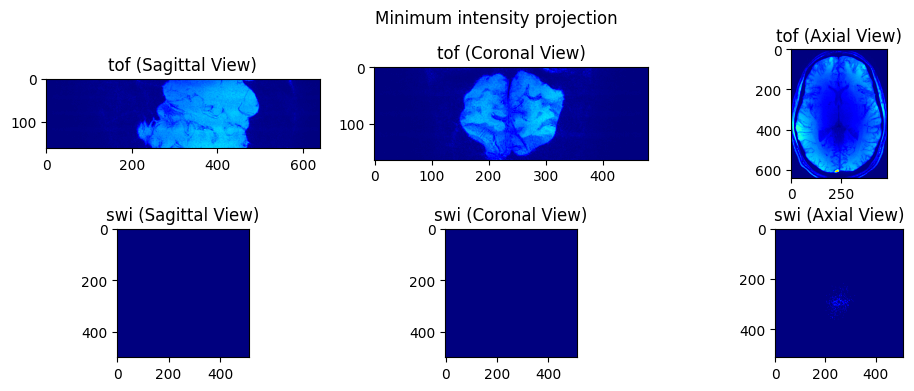

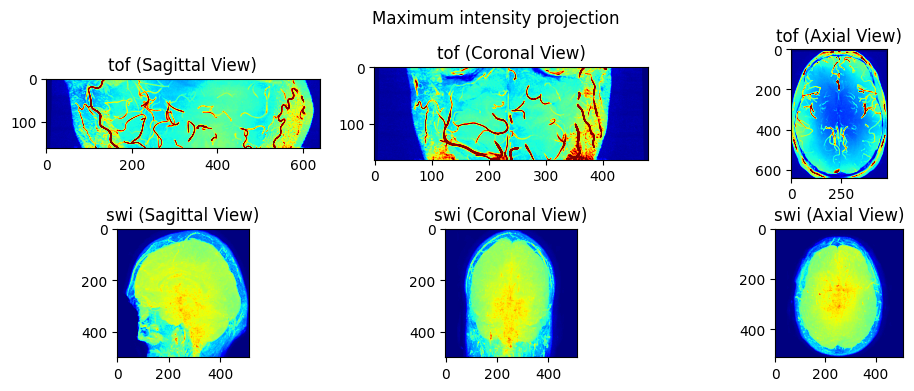

In [ ]:
#%%
# Maximum and Minimum intensity Projection
def plot_MaxIP(tof, swi, ip = 'max'):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 4), gridspec_kw={'hspace': 0.4})

    if ip == 'max':
        ip = 'Maximum'
        slc = np.arange(50, 100) #slice
        tof_sag = np.max(tof[:,slc,:], axis = 1).T
        tof_cor = np.max(tof[slc,:,:], axis = 0).T
        tof_axl = np.max(tof[:,:,slc], axis = 2)

        swi_sag = np.rot90(np.max(swi, axis = 1), k = 1)
        swi_cor = np.rot90(np.max(swi, axis = 0), k = 1)
        swi_axl = np.max(swi, axis = 2)
    # Minimum Intensity Projection
    else:
        ip = 'Minimum'
        slc = np.arange(50, 100) #slice
        tof_sag = np.min(tof[:,slc,:], axis = 1).T
        tof_cor = np.min(tof[slc,:,:], axis = 0).T
        tof_axl = np.min(tof[:,:,slc], axis = 2)

        swi_sag = np.rot90(np.min(swi, axis = 1), k = 1)
        swi_cor = np.rot90(np.min(swi, axis = 0), k = 1)
        swi_axl = np.min(swi, axis = 2)

    fig.suptitle(f'{ip} intensity projection')
    # Plot TOF intensity projections
    ax[0, 0].imshow(tof_sag, cmap = 'jet', vmax = 300), ax[0, 0].set_title(f'tof (Sagittal View)')
    ax[0, 1].imshow(tof_cor, cmap = 'jet', vmax = 300), ax[0, 1].set_title(f'tof (Coronal View)')
    ax[0, 2].imshow(tof_axl, cmap = 'jet', vmax = 300), ax[0, 2].set_title(f'tof (Axial View)')

    # Plot SWI intensity projections
    ax[1, 0].imshow(swi_sag, cmap = 'jet'), ax[1, 0].set_title(f'swi (Sagittal View)')
    ax[1, 1].imshow(swi_cor, cmap = 'jet'), ax[1, 1].set_title(f'swi (Coronal View)')
    ax[1, 2].imshow(swi_axl, cmap = 'jet'), ax[1, 2].set_title(f'swi (Axial View)')
    plt.show()
tof = np.rot90(image_info['tof'], k = 1)
swi = np.rot90(image_info['swi'], k = 1)
plot_MaxIP(tof, swi, ip = "min")
plot_MaxIP(tof, swi, ip = "max")
#%%

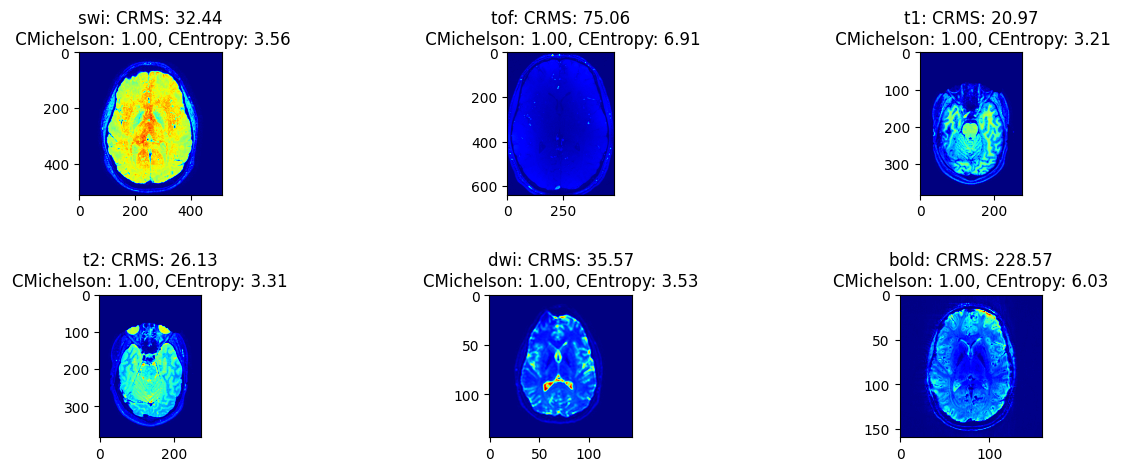

In [ ]:
#%%
def get_neural_img_slice(image):
    # This function obtains the z slice of each image
    zs = image.shape[2]
    mid_zs = zs // 2
    if len(image.shape) <= 3:
        z_slice = np.rot90(image[:, :, mid_zs], k=1) # Transpose
    else:
        z_slice = np.rot90(image[:, :, mid_zs, 0], k=1)
    return z_slice

def calculate_contrast(data):
    rms = np.sqrt(np.mean(np.square(data)))
    mch = (np.max(data) - np.min(data)) / (np.max(data) + np.min(data))
    H, _ = np.histogram(data.flatten(), bins=256, range=[0, 256])
    H = H / float(np.sum(H))
    etp = -np.sum(H * np.log2(H + np.finfo(float).eps))
    del(H)
    return rms, mch, etp

# Reporting Contrasts on the titles of the plots in part 1(a)
fig, ax = plt.subplots(nrows= 2, ncols = 3, figsize = (15, 5), gridspec_kw={'hspace': 0.7})
i = 0
for k,v in image_info.items():
    rms, mch, etp = calculate_contrast(v)
    if i < 3:
        ax[0, i].imshow(z_img_slice[k], cmap = 'jet')
        ax[0, i].set_title(f"{k}: CRMS: {rms:.2f}\n CMichelson: {mch:.2f}, CEntropy: {etp:.2f}")
    else:
        j = i-3
        ax[1, j].imshow(z_img_slice[k], cmap = 'jet')
        ax[1, j].set_title(f"{k}: CRMS: {rms:.2f}\nCMichelson: {mch:.2f}, CEntropy: {etp:.2f}")
    i += 1
plt.show()
#%%

----------------+----------
    Modality    |   SNR    
----------------+----------
    swi         |   10.241    
    tof         |   47.239    
    t1          |   7.868    
    t2          |   7.408    
    dwi         |   8.649    
    bold        |   39.778    
----------------+----------
TOF has the highest SNR while T2 has the lowest SNR




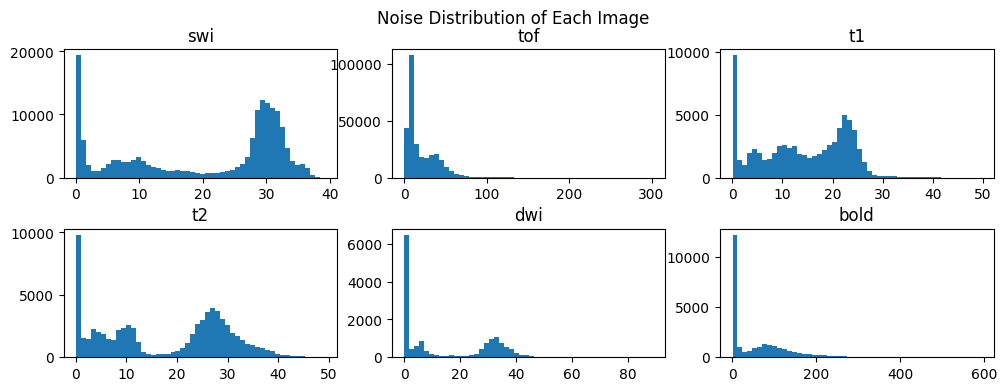

THE DISTRIBUTION OF NOISE IS MAJORLY BIMODAL


In [ ]:
#%%
def calculate_SNR(data):
    if len(data.shape) > 3:
        signal = np.mean(data, axis = 2).mean(axis = 2)
        noise = np.std(data, axis = 2).mean(axis = 2)
    else:
        signal = np.mean(data, axis = 2).flatten()
        noise = np.std(data, axis = 2).flatten()
    # retain non-zeros
    signal, noise = signal[noise != 0], noise[noise != 0]
    snr = (signal / noise) * 10
    return np.mean(snr), noise

noise_images = {}
print("----------------+----------")
print("    Modality    |   SNR    ")
print("----------------+----------")
for k,v in image_info.items():
    snr, noise = calculate_SNR(v)
    noise_images[k] = noise
    print(f"    {k:<8s}    |   {snr:.3f}    ")
print("----------------+----------")
print('TOF has the highest SNR while T2 has the lowest SNR')
print('\n')

# Visualize the Noise of each image
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 4), gridspec_kw={'hspace': 0.4})
i = 0
for k,v in noise_images.items():
    if i < 3:
        ax[0, i].hist(v, bins = 50), ax[0, i].set_title(k)
    else:
        j = i - 3
        ax[1, j].hist(v, bins = 50), ax[1, j].set_title(k)
    i += 1
fig.suptitle("Noise Distribution of Each Image")
plt.show()
print("THE DISTRIBUTION OF NOISE IS MAJORLY BIMODAL")
#%%

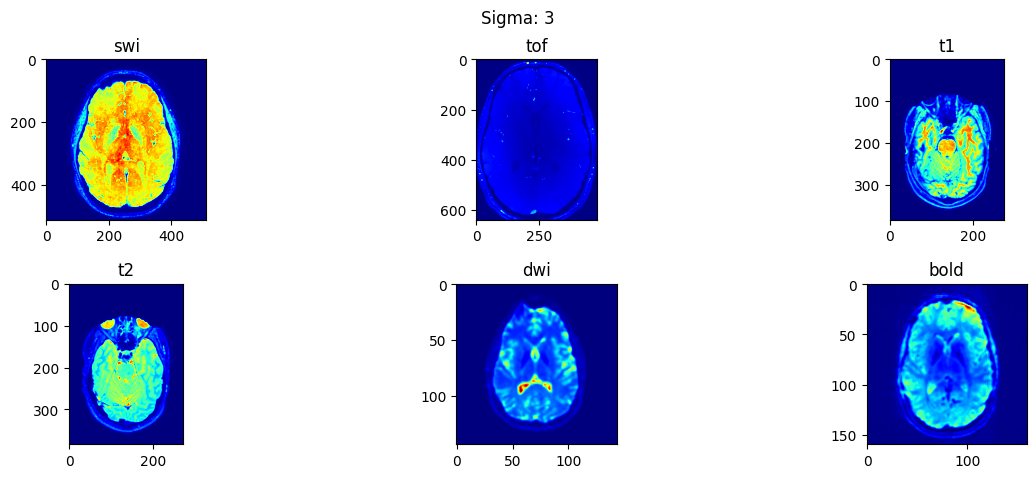

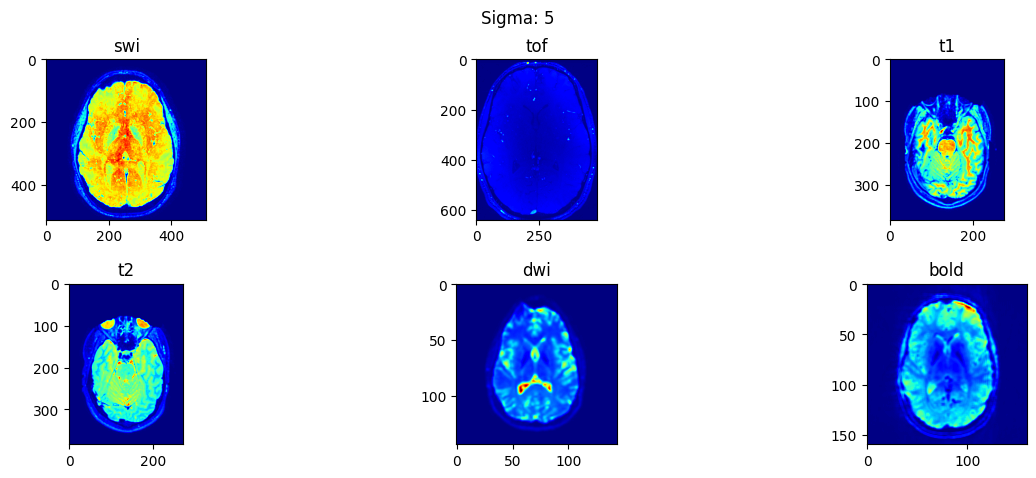

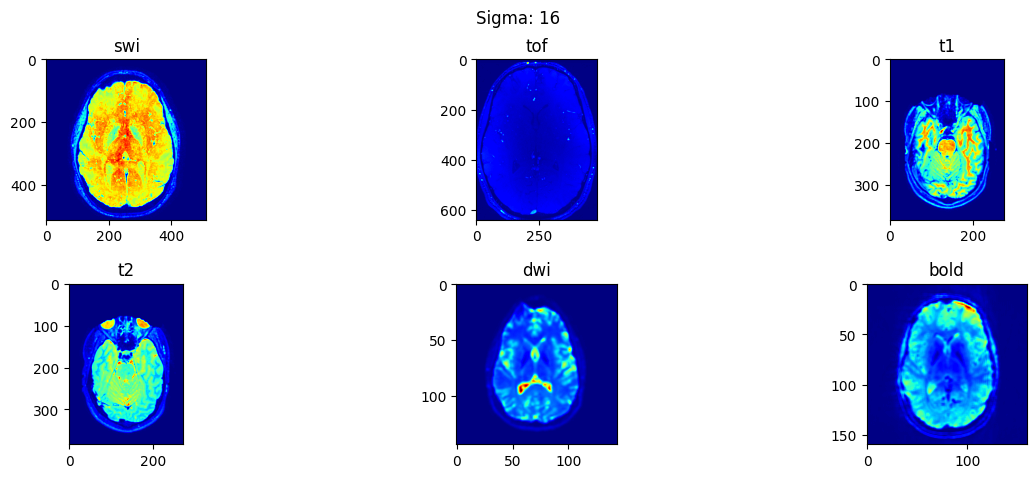

In [ ]:
def fourier_gaussian_filter(data, sigma):
    ks = 3 # kernel size
    c = ks//2 # Center
    kernel = np.zeros((ks, ks, ks)) # 3D Gaussian Kernel
    def Gauss3D(x, y, z, sigma):
        # Helper function
        return np.exp(-(x**2 + y**2 + z**2) / (2 * sigma**2)) / (2*np.pi*sigma**2)
    for i in range(ks):
        for j in range(ks):
            for k in range(ks):
                x, y, z = i-c, j-c, k-c
                kernel[i,j,k] = Gauss3D(x, y, z, sigma)
    # normalize kernel
    kernel = kernel / np.sum(kernel)
    # Fourier
    data_freq = np.fft.fftn(data)
    kernel_freq = np.fft.fftn(kernel, s = data.shape)
    filter_freq = data_freq * kernel_freq
    filter_data = np.real(np.fft.ifftn(filter_freq, s = data.shape[:2]))
    return filter_data.mean(axis = 0)

def plot_fourier_gauss(data_dict, sigma):
    filtered = {}
    for k,v in data_dict.items():
        filtered[k] = fourier_gaussian_filter(v, sigma)

    fig, ax = plt.subplots(nrows= 2, ncols = 3, figsize = (15, 5), gridspec_kw={'hspace': 0.4})
    for i, k in enumerate(filtered):
        if i < 3:
            ax[0, i].imshow(filtered[k], cmap = 'jet')
            ax[0, i].set_title(k)
        else:
            j = i-3
            ax[1, j].imshow(filtered[k], cmap = 'jet')
            ax[1, j].set_title(k)
    fig.suptitle(f"Sigma: {sigma}")
    plt.show()

for sigma in [3, 5, 16]:
    plot_fourier_gauss(z_img_slice, sigma)
    print("\n")

### COMMENTS
- TOF has the highest SNR while T2 has the lowest SNR
- The distribution of noise is majorly Bimodal; where SWI, T1, and T2 are Well exposed while the rest are under exposed

In [ ]:
!pip install dipy

from dipy.denoise.nlmeans import nlmeans
from dipy.denoise.noise_estimate import estimate_sigma

for k in image_info:
    v = image_info[k]
    sigma = estimate_sigma(v, N = 16)
    den = nlmeans(v, sigma)
    noise = v - den
    slice_img = get_neural_img_slice(v)
    slice_den = get_neural_img_slice(den)
    slice_noise = get_neural_img_slice(noise)

    fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize = (15, 5), gridspec_kw={'hspace': 0.4})

    ax[0].imshow(slice_img, cmap = 'jet'), ax[0].set_title('Original')
    ax[1].imshow(slice_den, cmap = 'jet'), ax[1].set_title('denoised')
    ax[2].imshow(slice_noise, cmap = 'jet'), ax[2].set_title('method noise')
    fig.suptitle(k)
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.9 MB/s eta 0:00:00
